In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

import pickle

%matplotlib inline
pd.options.display.max_rows = 500
pd.options.display.max_columns = 500

import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [4]:
path = '/content/gdrive/Shareddrives/STATS 170A Final Project/datasets/'

## Helper Functions

In [5]:
def load_data(fname):
    df = pd.DataFrame()
    with open(path+'Data_Frames/'+fname,'rb') as infile:
        df = pickle.load(infile)
    return df

In [6]:
def save_data(df,fname):
    with open(path+'Data_Frames/'+fname, 'wb') as outfile:
        pickle.dump(df,outfile)
    return 0

In [ ]:
def split_data(df, feat_col, time=20170902): 
    x_train = df[df['week_end']<=time][feat_col]
    y_train = df[df['week_end']<=time]['sale']

    x_test = df[df['week_end']>time][feat_col]
    y_test = df[df['week_end']>time]['sale']
    return x_train,y_train,x_test,y_test

In [ ]:
def evaluate(model, x_train, y_train, x_test, y_test):
    ypred = model.predict(x_train)
    print("Training MAE: ",np.mean(np.abs(ypred-y_train)))
    ypred_test = model.predict(x_test)
    print("Testing MAE: ", np.mean(np.abs(ypred_test-y_test)))

In [7]:
!pip install catboost

     |████████████████████████████████| 69.2MB 55kB/s 


In [8]:
from catboost import CatBoostRegressor

# Loading Data Frames

In [9]:
pop_tx_2017 = load_data('pop_tx_2017.pkl')

In [10]:
pop_tx_2017

,fips_county_code,pop,white_pop,black_pop,asian_pop,indian_pop,pacific_pop,two_pop,hisp_pop
25227,1,58175,43522,12695,520,394,80,964,10339
25237,3,17603,16595,345,129,253,4,277,9860
25247,5,87572,71186,13491,1036,640,57,1162,19388
25257,7,25392,23665,451,478,308,21,469,7012
25267,9,8783,8392,91,40,122,3,135,753
25277,11,1867,1801,20,2,28,0,16,141
25287,13,49083,46976,574,310,593,60,570,31615
25297,15,29722,26008,2815,225,241,12,421,7999
25307,17,7066,6545,135,66,222,9,89,4533
25317,19,22327,21347,226,120,280,10,344,4197


In [ ]:
df_tx_data2 = load_data('df_tx_data2.pkl')

In [ ]:
df_tx_data2.head()

,sale,fips_state_code,fips_county_code,week_end,product_group_code,hurricane,last_week_sale,last_week_sale_diff,week_end_date,log_sale,SOVI_SCORE,HRCN_EVNTS,HRCN_AFREQ,HRCN_EXPP,HRCN_RISKS
0,1893.54,48,1,20170204,0501,0.0,1783.48,-353.08,204,7.546203,22.782814,3.0,0.018622,58025.693211,2.045053
1,5080.40,48,1,20170211,0501,0.0,1893.54,110.06,211,8.533145,22.782814,3.0,0.018622,58025.693211,2.045053
2,2068.19,48,1,20170218,0501,0.0,5080.40,3186.86,218,7.634429,22.782814,3.0,0.018622,58025.693211,2.045053
3,1766.81,48,1,20170225,0501,0.0,2068.19,-3012.21,225,7.476931,22.782814,3.0,0.018622,58025.693211,2.045053
4,1645.77,48,1,20170304,0501,0.0,1766.81,-301.38,304,7.405964,22.782814,3.0,0.018622,58025.693211,2.045053


In [ ]:
df_tx_data3 = df_tx_data2.merge(pop_tx_2017, on='fips_county_code')

In [ ]:
save_data(df_tx_data3, 'df_tx_data3.pkl')

0

# Preparing Data for Modeling

In [11]:
df_tx_data3 = load_data('df_tx_data3.pkl')

In [13]:
ts = TimeSeriesSplit()
ts.split(df_tx_data3)

<generator object TimeSeriesSplit.split at 0x7ffa63cc0b50>

In [14]:
tr = []
te = []
for train_index, test_index in ts.split(df_tx_data3):
    tr.append(train_index)
    te.append(test_index)

In [39]:
def split_data(df, feat_col, time=20170902): 
    x_train = df[df['week_end']<=time][feat_col]
    y_train = df[df['week_end']<=time]['sale']

    x_test = df[df['week_end']>time][feat_col]
    y_test = df[df['week_end']>time]['sale']
    return x_train,y_train,x_test,y_test

In [ ]:
df_tx_data3.columns

Index(['sale', 'fips_state_code', 'fips_county_code', 'week_end',
       'product_group_code', 'hurricane', 'last_week_sale',
       'last_week_sale_diff', 'week_end_date', 'log_sale', 'SOVI_SCORE',
       'HRCN_EVNTS', 'HRCN_AFREQ', 'HRCN_EXPP', 'HRCN_RISKS', 'pop',
       'white_pop', 'black_pop', 'asian_pop', 'indian_pop', 'pacific_pop',
       'two_pop', 'hisp_pop'],
      dtype='object')

In [ ]:
df_tx_data3['week_end_date'].unique()

array([ 204,  211,  218,  225,  304,  311,  318,  325,  401,  408,  415,
        422,  429,  506,  513,  520,  527,  603,  610,  617,  624,  701,
        708,  715,  722,  729,  805,  812,  819,  826,  902,  909,  916,
        923,  930, 1007, 1014, 1021, 1028, 1104, 1111, 1118, 1125, 1202,
       1209, 1216, 1223, 1230])

In [ ]:
len(df_tx_data3['week_end_date'].unique())

48

In [ ]:
df_tx_data3[df_tx_data3['hurricane'] == 1]['week_end_date'].unique()

array([826, 902, 909, 916])

## Feature Combinations

In [17]:
feat_comb1 = ['week_end_date','fips_county_code','product_group_code', 'hurricane', 'last_week_sale', 'last_week_sale_diff']
feat_comb2 = ['week_end_date','fips_county_code','product_group_code', 'hurricane', 'last_week_sale', 'last_week_sale_diff', 'SOVI_SCORE',
             'HRCN_EVNTS', 'HRCN_AFREQ', 'HRCN_EXPP', 'HRCN_RISKS']
feat_comb3 = ['week_end_date','fips_county_code','product_group_code', 'hurricane', 'last_week_sale', 'last_week_sale_diff', 'pop',
             'white_pop', 'black_pop', 'asian_pop', 'indian_pop', 'pacific_pop', 'two_pop', 'hisp_pop']
feat_comb4 = ['fips_county_code','product_group_code', 'hurricane', 'last_week_sale', 'last_week_sale_diff', 'pop',
             'white_pop', 'black_pop', 'asian_pop', 'indian_pop', 'pacific_pop', 'two_pop', 'hisp_pop', 'SOVI_SCORE',
             'HRCN_EVNTS', 'HRCN_AFREQ', 'HRCN_EXPP', 'HRCN_RISKS']
feat_comb5 = ['week_end_date','fips_county_code','product_group_code', 'hurricane', 'last_week_sale_diff']

In [ ]:
useful_product_group_codes = ['0503', '1503', '1507', '4507', '4510', '5001' ,'5003' ,'5513' ,'6002', '6003' ,'6012']

In [ ]:
temp = df_tx_data3[df_tx_data3['product_group_code']=='0503']

In [ ]:
temp = temp[temp['fips_county_code']==1]

In [ ]:
temp[['week_end_date','sale','last_week_sale','last_week_sale_diff']].rename(columns={'week_end_date':'Week End Date','sale':'Sale','last_week_sale':'Last Week Sale','last_week_sale_diff':'Last Week Sale Change'}).set_index('Week End Date')

,Sale,Last Week Sale,Last Week Sale Change
Week End Date,,,
204,9848.59,9194.32,401.35
211,13019.73,9848.59,654.27
218,25036.60,13019.73,3171.14
225,10291.19,25036.60,12016.87
304,10121.67,10291.19,-14745.41
311,10469.85,10121.67,-169.52
318,9911.26,10469.85,348.18
325,9308.40,9911.26,-558.59
401,9647.89,9308.40,-602.86


# Models

In [ ]:
feat_comb1 = ['week_end_date','fips_county_code','product_group_code', 'hurricane', 'last_week_sale', 'last_week_sale_diff']
feat_comb2 = ['week_end_date','fips_county_code','product_group_code', 'hurricane', 'last_week_sale', 'last_week_sale_diff', 'SOVI_SCORE',
             'HRCN_EVNTS', 'HRCN_AFREQ', 'HRCN_EXPP', 'HRCN_RISKS']
feat_comb3 = ['week_end_date','fips_county_code','product_group_code', 'hurricane', 'last_week_sale', 'last_week_sale_diff', 'pop',
             'white_pop', 'black_pop', 'asian_pop', 'indian_pop', 'pacific_pop', 'two_pop', 'hisp_pop']
feat_comb4 = ['fips_county_code','product_group_code', 'hurricane', 'last_week_sale', 'last_week_sale_diff', 'pop',
             'white_pop', 'black_pop', 'asian_pop', 'indian_pop', 'pacific_pop', 'two_pop', 'hisp_pop', 'SOVI_SCORE',
             'HRCN_EVNTS', 'HRCN_AFREQ', 'HRCN_EXPP', 'HRCN_RISKS']
feat_comb5 = ['week_end_date','fips_county_code','product_group_code', 'hurricane', 'last_week_sale_diff']

In [38]:
def evaluate(model, x_train, y_train, x_test, y_test):
    ypred = model.predict(x_train)
    print("Training MAE: ",np.mean(np.abs(ypred-y_train)))
    ypred_test = model.predict(x_test)
    print("Testing MAE: ", np.mean(np.abs(ypred_test-y_test)))

In [16]:
rf_param_grid = {
    'n_estimators':range(10,71,10),
    'max_depth':range(3,14,2), 
    'min_samples_split':range(50,201,20),
    'min_samples_leaf':range(10,60,10),
    'max_features':range(3,11,2)
}

## Parameter Tuning

In [24]:
X = df_tx_data3[feat_comb4]
Y = df_tx_data3['sale']

In [25]:
rf = RandomForestRegressor(random_state=0)

In [26]:
from sklearn.model_selection import RandomizedSearchCV

In [28]:
ts = TimeSeriesSplit()
tss = ts.split(X)
random_search = RandomizedSearchCV(rf, param_distributions=rf_param_grid, n_iter=20, scoring='neg_mean_absolute_error', n_jobs=8, cv=tss, verbose=3, random_state=0)
search = random_search.fit(X,Y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:  1.7min
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed: 15.0min finished


In [30]:
search.best_params_

{'max_depth': 13,
 'max_features': 9,
 'min_samples_leaf': 10,
 'min_samples_split': 90,
 'n_estimators': 50}

In [31]:
best_params = search.best_params_

In [33]:
best_params['random_state'] = 0

In [44]:
rf_search = RandomForestRegressor(**best_params)

In [40]:
x_train,y_train,x_test,y_test = split_data(df_tx_data3,feat_comb4)

In [45]:
rf_search.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=13, max_features=9, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=90, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [47]:
evaluate(rf_search, x_train, y_train, x_test, y_test)

Training MAE:  1412.781225449411
Testing MAE:  2193.642536508366


## Random Forest

### RF with Feat Comb 1

In [ ]:
x_train,y_train,x_test,y_test = split_data(df_tx_data3,feat_comb1)

In [ ]:
rf1 = RandomForestRegressor(**best_params)
rf1.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
evaluate(rf1, x_train, y_train, x_test, y_test)

Training MAE:  586.8937381115616
Testing MAE:  2356.144249315122


In [ ]:
pd.Series(rf1.feature_importances_, index=feat_comb1)

week_end_date          0.002644
fips_county_code       0.001057
product_group_code     0.006808
hurricane              0.000996
last_week_sale         0.979552
last_week_sale_diff    0.008944
dtype: float64

In [ ]:
explainer = shap.TreeExplainer(rf1)

In [ ]:
chosen_instance = x_train.loc[[28340]]
shap_values = explainer.shap_values(chosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0], chosen_instance)

In [ ]:
shap_values = explainer.shap_values(x_train)
shap.summary_plot(shap_values, x_train)

### RF with Feat Comb 2

In [ ]:
x_train,y_train,x_test,y_test = split_data(df_tx_data3,feat_comb2)

In [ ]:
rf2 = RandomForestRegressor(**best_params)
rf2.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
evaluate(rf2, x_train, y_train, x_test, y_test)

Training MAE:  583.6070451156558
Testing MAE:  2354.169081625464


In [ ]:
pd.Series(rf2.feature_importances_, index=feat_comb2)

week_end_date          0.002451
fips_county_code       0.000361
product_group_code     0.006659
hurricane              0.000982
last_week_sale         0.979586
last_week_sale_diff    0.008078
SOVI_SCORE             0.000523
HRCN_EVNTS             0.000137
HRCN_AFREQ             0.000193
HRCN_EXPP              0.000815
HRCN_RISKS             0.000215
dtype: float64

In [ ]:
explainer = shap.TreeExplainer(rf2)

In [ ]:
chosen_instance = x_train.loc[[28340]]
shap_values = explainer.shap_values(chosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0], chosen_instance)

In [ ]:
df_tx_data3['HRCN_EXPP'].describe()

count    3.907160e+05
mean     3.093272e+05
std      6.245894e+05
min      8.488161e+03
25%      3.810600e+04
50%      9.236858e+04
75%      2.788310e+05
max      4.073495e+06
Name: HRCN_EXPP, dtype: float64

### RF with Feat Comb 3

In [ ]:
x_train,y_train,x_test,y_test = split_data(df_tx_data3,feat_comb3)

In [ ]:
rf3 = RandomForestRegressor(**best_params)
rf3.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
evaluate(rf3, x_train, y_train, x_test, y_test)

Training MAE:  583.7033475475412
Testing MAE:  2345.862125698545


In [ ]:
pd.Series(rf3.feature_importances_, index=feat_comb3)

week_end_date          0.002414
fips_county_code       0.000444
product_group_code     0.006469
hurricane              0.001080
last_week_sale         0.979704
last_week_sale_diff    0.007969
pop                    0.000214
white_pop              0.000207
black_pop              0.000199
asian_pop              0.000452
indian_pop             0.000232
pacific_pop            0.000221
two_pop                0.000264
hisp_pop               0.000131
dtype: float64

In [ ]:
explainer = shap.TreeExplainer(rf3)
chosen_instance = x_train.loc[[28340]]
shap_values = explainer.shap_values(chosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0], chosen_instance)

## CatBoost

In [ ]:
!pip3 install catboost

     |████████████████████████████████| 67.3MB 53kB/s 


In [ ]:
from catboost import CatBoostRegressor

In [ ]:
model_cb = CatBoostRegressor(random_state=0, iterations=5000)

In [ ]:
x_train,y_train,x_test,y_test = split_data(df_tx_data3,feat_comb4)

In [ ]:
model_cb.fit(x_train, y_train, [0,1])

Streaming output truncated to the last 5000 lines.
0:	learn: 65235.2414265	total: 165ms	remaining: 13m 43s
1:	learn: 63461.8426017	total: 307ms	remaining: 12m 46s
2:	learn: 61724.3836052	total: 428ms	remaining: 11m 53s
3:	learn: 60061.4282864	total: 549ms	remaining: 11m 25s
4:	learn: 58445.4104047	total: 688ms	remaining: 11m 27s
5:	learn: 56878.2186989	total: 828ms	remaining: 11m 29s
6:	learn: 55367.2968649	total: 954ms	remaining: 11m 20s
7:	learn: 53910.1126088	total: 1.07s	remaining: 11m 5s
8:	learn: 52495.1077319	total: 1.21s	remaining: 11m 12s
9:	learn: 51133.5526065	total: 1.32s	remaining: 10m 58s
10:	learn: 49813.5349168	total: 1.44s	remaining: 10m 54s
11:	learn: 48538.8510956	total: 1.56s	remaining: 10m 48s
12:	learn: 47299.6618187	total: 1.7s	remaining: 10m 53s
13:	learn: 46103.7554583	total: 1.81s	remaining: 10m 44s
14:	learn: 44962.9281343	total: 1.94s	remaining: 10m 43s
15:	learn: 43851.1227815	total: 2.07s	remaining: 10m 45s
16:	learn: 42786.1914197	total: 2.19s	remaining: 

In [ ]:
evaluate(model_cb, x_train, y_train, x_test, y_test)

Training MAE:  1295.1095862806856
Testing MAE:  2234.3553574850353


In [ ]:
np.mean(np.abs(df_tx_data3['last_week_sale_diff']))

1601.8166367728504

In [ ]:
np.mean(df_tx_data3['sale'])

18600.460904377243

# Shap

In [ ]:
!pip3 install shap

     |████████████████████████████████| 358kB 5.2MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491624 sha256=4dccd4ee4de2ad6d2772a9400e089802dfa91560e8b3b33af0e4073bc5b6d793
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


In [ ]:
import shap

In [ ]:
explainer = shap.TreeExplainer(rf1)

In [ ]:
x_train[x_train['hurricane'] == 1]

,week_end_date,fips_county_code,product_group_code,hurricane,last_week_sale,last_week_sale_diff
28340,826,39,0501,1.0,14822.87,2000.63
28341,902,39,0501,1.0,17617.64,2794.77
28388,826,39,0503,1.0,35708.19,-136.55
28389,902,39,0503,1.0,43003.10,7294.91
28436,826,39,0504,1.0,523.53,-56.82
...,...,...,...,...,...,...
362289,902,471,6017,1.0,7255.43,-216.25
362336,826,471,6018,1.0,8804.95,335.26
362337,902,471,6018,1.0,9863.79,1058.84
362384,826,471,9599,1.0,1534.81,-835.26


In [ ]:
x_train.loc[[28340]]

,week_end_date,fips_county_code,product_group_code,hurricane,last_week_sale,last_week_sale_diff
28340,826,39,0501,1.0,14822.87,2000.63


In [ ]:
chosen_instance = x_train.loc[[28340]]
shap_values = explainer.shap_values(chosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0], chosen_instance)

In [ ]:
vis_single_prediction(rf1)

In [ ]:
shap.initjs()

In [ ]:
explainer = shap.TreeExplainer(model_cb)
shap_values = explainer.shap_values(x_train)

In [ ]:
feat_comb4 = ['fips_county_code','product_group_code', 'hurricane', 'last_week_sale', 'last_week_sale_diff', 'pop',
             'white_pop', 'black_pop', 'asian_pop', 'indian_pop', 'pacific_pop', 'two_pop', 'hisp_pop', 'SOVI_SCORE',
             'HRCN_EVNTS', 'HRCN_AFREQ', 'HRCN_EXPP', 'HRCN_RISKS']
feature_names4 = ['Fips County Code','Product Group Code', 'Hurricane (Y/N)', 'Last Week Sale', 'Last Week Sale Change', 'Total Population',
             'White Population', 'Black Population', 'Asian Population', 'Indian Population', 'Pacific Population', '2+ Race Population', 'Hispanic Population',
              'Social Vul. Score', 'Hrcn Events.', 'Hrcn Freq.', 'Hrcn Exp.Building', 'Hrcn Risk Score']

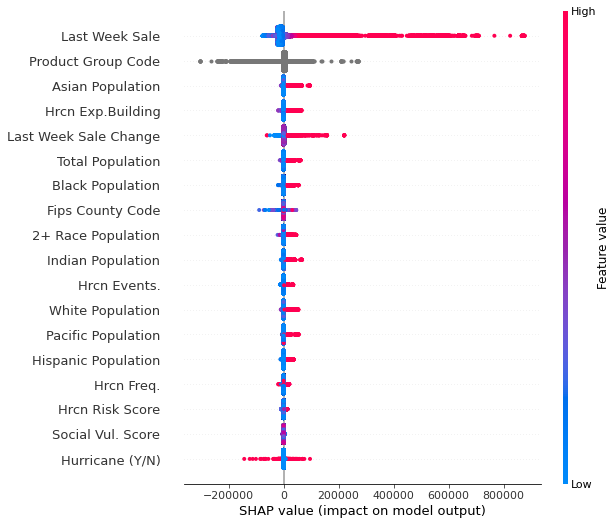

In [ ]:
shap.summary_plot(shap_values, features=x_train, feature_names=feature_names4)

# Findings

In [ ]:
# product group codes with P-Value < 0.05 according to LME model
useful_product_group_codes = ['0503', '1503', '1507', '4507', '4510', '5001' ,'5003' ,'5513' ,'6002', '6003' ,'6012']
# snacks, drinks, medications/remedies/healthaids, housewares